# The Final Production Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, plot_roc_curve, roc_auc_score, accuracy_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


import thor

In [2]:
# load in the final test set; we have not touched this until now, so this is strictly unseen data.
test = pd.read_csv('../data/total_test.csv')

X = test['title']
y = test['class']

In [3]:
# Let's bring in our SVM model which seems to have worked the best
final_model = joblib.load('../models/svm3.pkl')

# Let's evaluate the SVM score on the test set we've held out up until now.
final_model.score(X, y)

0.9384942863544701

Accuracy:  0.9384942863544701
 
Recall:  0.6113074204946997
 
Precision:  0.8639200998751561
 
F1:  0.7159855147439214


C:\Users\herma\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


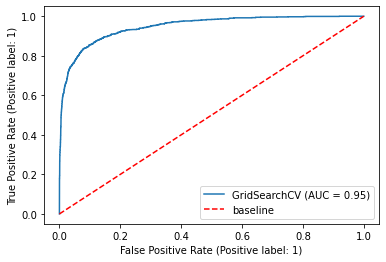

In [4]:
preds = final_model.predict(X)

print("Accuracy: ", accuracy_score(y, preds))
print(" ")
print("Recall: ", recall_score(y, preds))
print(" ")
print("Precision: ", precision_score(y, preds))
print(" ")
print("F1: ", f1_score(y, preds))

#plot roc curve
plot_roc_curve(final_model, X, y);

plt.plot([0,1],[0,1], linestyle='--', color='red', label='baseline');
plt.legend();

In [5]:
# build final production model by training on all data.
total = pd.read_csv('../data/total.csv')

X_total = total['title']
y_total = total['class']

In [6]:
total.shape

(89255, 3)

In [7]:
final_model.best_params_

{'cvec__max_df': 0.3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'svm__C': 0.5}

In [8]:
# instantiate pipeline and fit model
production_model = Pipeline([
                        ('cvec', CountVectorizer(binary=True, ngram_range=(1,2), max_df=0.3)),
                        ('svm', LinearSVC(C=0.5))
                    ])


production_model.fit(X,y)

Pipeline(steps=[('cvec',
                 CountVectorizer(binary=True, max_df=0.3, ngram_range=(1, 2))),
                ('svm', LinearSVC(C=0.5))])

In [9]:
production_model.score(X,y)

0.9998879677347076

Accuracy:  0.9998879677347076
 
Recall:  0.9991166077738516
 
Precision:  1.0
 
F1:  0.9995581087052585


C:\Users\herma\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


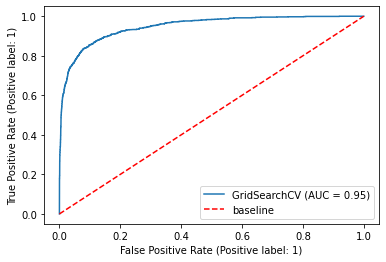

In [10]:
# quick look at metrics
preds = production_model.predict(X)

print("Accuracy: ", accuracy_score(y, preds))
print(" ")
print("Recall: ", recall_score(y, preds))
print(" ")
print("Precision: ", precision_score(y, preds))
print(" ")
print("F1: ", f1_score(y, preds))

#plot roc curve
plot_roc_curve(final_model, X, y);

plt.plot([0,1],[0,1], linestyle='--', color='red', label='baseline');
plt.legend();

In [11]:
# save model
joblib.dump(production_model, '../models/production_model_svm.pkl')

['../models/production_model_svm.pkl']

# Random Forest

Let us also evaluate the Random Forest model which we trained on the balanced data set.

In [12]:
test = pd.read_csv('../data/total_test.csv')

X = test['title']
y = test['class']

randomforest = joblib.load('../models/forest.pkl')

In [13]:
randomforest.score(X,y)

0.8493166031817163